In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [3]:

def create_dataset():
    X, y = make_classification(n_samples = 10000,
                               n_features = 2,
                               n_redundant = 0,
                               n_classes = 2,
                               flip_y = 0,
                               n_clusters_per_class = 2,
                               class_sep = 0.79,
                               weights = [0.99],
                               random_state = 81)
    return pd.DataFrame(X, columns = ['feature_1', 'feature_2']), pd.Series(y)

In [4]:
def plot_dataset(X, y, label):
    print(y.value_counts())

    markers = {1: "X", 0: "v"}
    sns.scatterplot(data = X, x = 'feature_1', y = 'feature_2', hue = y, style = y, markers = markers)

    plt.title(label)
    plt.ylim(-5, 4)
    plt.xlim(-3, 3)

    plt.show()

0    9900
1     100
dtype: int64


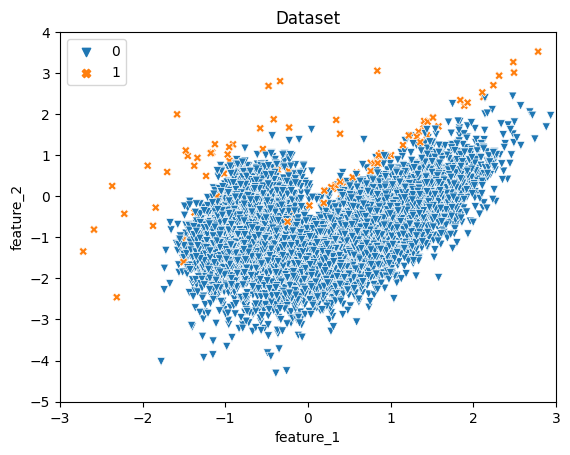

In [5]:
X, y = create_dataset()

plot_dataset(X, y, "Dataset")

### Borderline-SMOTE :

Borderline-SMOTE is an extension of the SMOTE algorithm designed to address the class imbalance problem in machine learning. It focuses on generating synthetic samples only for instances near the decision boundary, specifically those in the minority class that are difficult to classify correctly. By targeting borderline cases, Borderline-SMOTE aims to enhance the robustness of oversampling, mitigating potential noise introduced by SMOTE. This technique helps improve the performance of classifiers on imbalanced datasets by providing more relevant synthetic samples for minority class instances.

Before:  [(0, 9900), (1, 100)]
After:  [(0, 9900), (1, 9900)]
0    9900
1    9900
dtype: int64


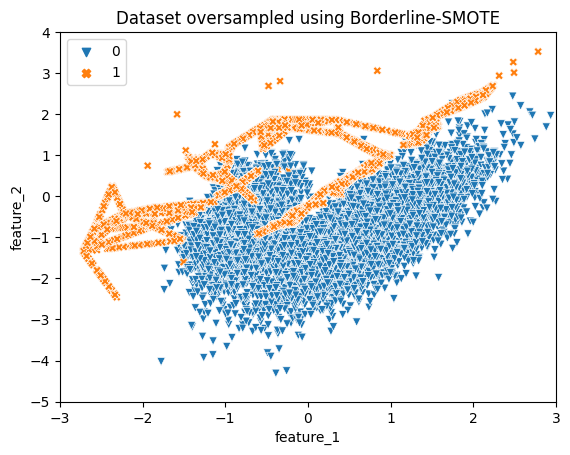

In [8]:
print("Before: ", sorted(Counter(y).items()))
from imblearn.over_sampling import BorderlineSMOTE

X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)
print("After: ", sorted(Counter(y_resampled).items()))

plot_dataset(X_resampled, y_resampled, "Dataset oversampled using Borderline-SMOTE")